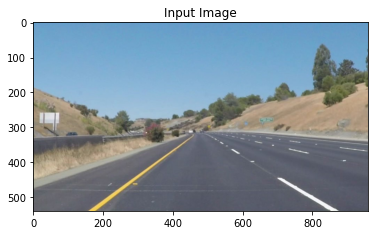

In [1]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
image=mpimg.imread("test.jpeg")
ysize=image.shape[0]
xsize=image.shape[1]
color_select=np.copy(image)
red_threshold=200
green_threshold=200
blue_threshold=200
rgb_threshold=[red_threshold,green_threshold,blue_threshold]
thresholds=(image[:,:,0]<rgb_threshold[0])|\
(image[:,:,1]<rgb_threshold[1])|\
(image[:,:,2]<rgb_threshold[2])

plt.imshow(image)
plt.title("Input Image")
plt.show()

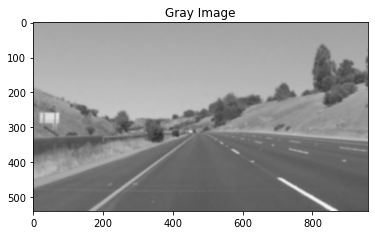

In [3]:
import cv2
def fixColor(image):
    return(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=cv2.GaussianBlur(gray,(11,11),0)
plt.imshow(fixColor(gray))
plt.title("Gray Image")
plt.show()

(540, 960, 3)


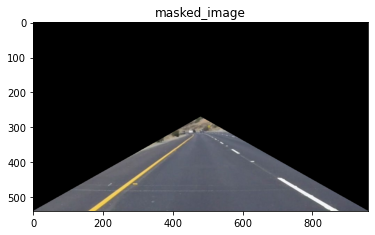

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image=cv2.imread("test.jpeg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(image.shape)
height=image.shape[0]
width=image.shape[1]
region_of_interest_vertices=[(0,height),(width/2,height/2),(width,height)]
def region_of_interest(img,vertices):
    mask=np.zeros_like(img)
    channel_count=img.shape[2]
    match_mask_color=(255,) *channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image
cropped_image=region_of_interest(image, np.array([region_of_interest_vertices],np.int32))
plt.imshow(cropped_image)
plt.title("masked_image")
plt.show()


(540, 960, 3)


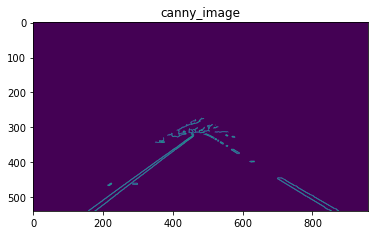

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
def region_of_interest(img,vertices):
    mask=np.zeros_like(img)
    #channel_count=img.shape[2]
    match_mask_color=255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

            
image=cv2.imread("test.jpeg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(image.shape)
height=image.shape[0]
width=image.shape[1]
region_of_interest_vertices=[(0,height),(width/2,height/2),(width,height)]
gray_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
canny_image=cv2.Canny(gray_image, 100, 200)
cropped_image=region_of_interest(canny_image, np.array([region_of_interest_vertices],np.int32))

plt.imshow(cropped_image)
plt.title("canny_image")

plt.show()



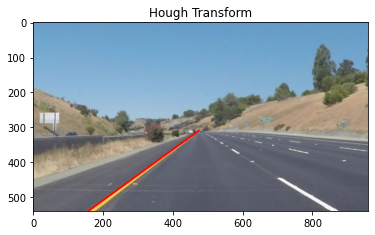

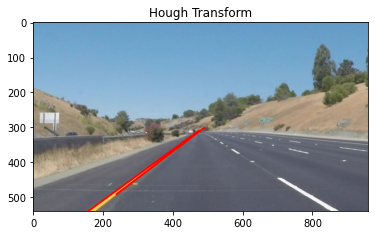

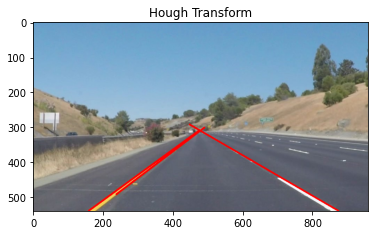

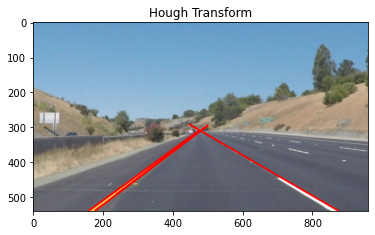

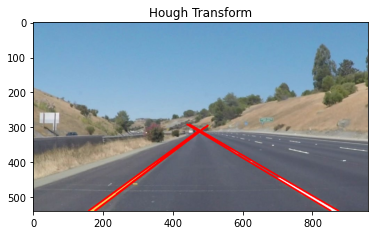

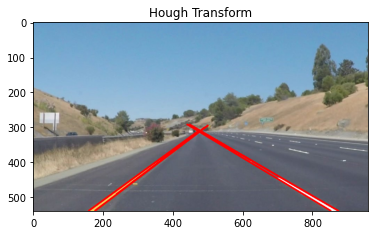

In [6]:
lines=cv2.HoughLinesP(cropped_image,
                      rho=1,
                      theta=np.pi/180,
                      threshold=100,
                      minLineLength=5,
                      maxLineGap=250)
for line in lines:
    x1,y1,x2,y2=line[0]
    if(y1>400 or y2>400):
        cv2.line(image,(x1,y1),(x2,y2),(255,0,0),3)
        plt.imshow(image)
        plt.title("Hough Transform")
        plt.show()